Notebook for elaboration of grid frames. First we may want to import the libraries for data manipulation.

In [1]:
from matplotlib import cm
from celluloid import Camera
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Then we're going to define the amount of points per frame, previously defined in the C program, and read with Pandas the csv output.

In [2]:
FRAME_POINTS = 6724

raw = []
data = []
raw = pd.read_csv('./output.txt', names=['x', 'y', 'd'])

Size of raw output.txt:

In [3]:
print(len(raw))

342924


Now let's put the raw data into the structure we'll be using to plot the frames; with FRAME_POINTS we can divide the output into single frames.

In [4]:
start = 0
end = FRAME_POINTS
while (start != len(raw)):
    frame = {"x": raw.x[start:end], "y": raw.y[start:end], "density": raw.d[start:end]}
    data.append(frame)
    start = end
    end += FRAME_POINTS

Amount of frames:

In [5]:
print(len(data))

51


Points per frame:

In [6]:
print(len(data[0]['x']))

6724


In [7]:
raw.head()

,x,y,d
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [8]:
raw.describe()

,x,y,d
count,342924.000000,342924.000000,342924.000000
mean,40.500000,40.500000,0.420653
std,23.669635,23.669635,8.082820
min,0.000000,0.000000,0.000000
25%,20.000000,20.000000,0.000000
50%,40.500000,40.500000,0.000000
75%,61.000000,61.000000,0.000000
max,81.000000,81.000000,255.000000


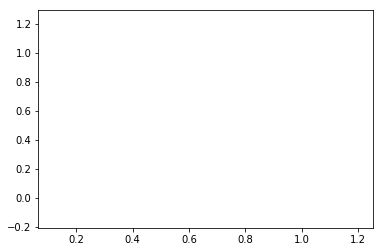

In [10]:
'''
for i in range(len(data)):
    fig, ax = plt.subplots(figsize=(10, 10))

    ax.scatter(data[i]['x'], data[i]['y'], c=data[i]['density'])
    ax.set_aspect(1)

    plt.show()
'''
'''
def main():
    numframes = 10
    numpoints = 6724
    color_data = np.random.random((numframes, numpoints))
    x, y, c = data[0]['x'], data[0]['y'], data[0]['density']

    fig = plt.figure(figsize=(10, 10))
    scat = plt.scatter(x, y, c=c, s=100)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(numframes),
                                  fargs=(color_data, scat))
    plt.show()
    ani.save('animation.mp4')

def update_plot(i, custom_data, scat):
    #cust_x = [data[i]['x'], np.newaxis()]
    #cust_y = [data[i]['y'], np.newaxis()]
    #d = np.hstack((data[i]['x'][:FRAME_POINTS, np.newaxis], data[i]['y'][:FRAME_POINTS, np.newaxis]))
    #scat.set_offsets((data[i]['x'], data[i]['y']))
    scat.set_offsets(np.c_[data[i]['x'], data[i]['y']])
    scat.set_array(data[i]['density'])
    return scat,

main()
'''
numpoints = 10
points = np.random.random((2, numpoints))
colors = cm.rainbow(np.linspace(0, 1, numpoints))
camera = Camera(plt.figure())
for _ in range(100):
    points += 0.1 * (np.random.random((2, numpoints)) - .5)
    plt.scatter(*points, c=colors, s=100)
    camera.snap()
anim = camera.animate(blit=True)
#anim.save('scatter.mp4')